# Clustering Coefficient and Path Length

In [Small World Graph](http://nbviewer.jupyter.org/github/XiaoTaoWang/Think-Complexity-Notes/blob/master/notebooks/Small-World-Graph.ipynb), we mentioned that Watts and Strogatz had proposed two quantities, clustering coefficient and path length, to measure corresponding two properties of small-world graphs, however, we skipped implementaion details by using *networkx*'s builtin functions directly. In this note, we'll define our own functions. 

In [1]:
%load_ext watermark

In [2]:
%watermark -v -p numpy,networkx,matplotlib

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
networkx 1.11
matplotlib 1.5.3


## Clustering Coefficient

To compute the average clustering coefficient of a graph, we need to know clustering coefficient of each node at first:

In [3]:
def node_clustering(G, v):
    
    neighbors = G.neighbors(v)
    k = len(neighbors)
    if k < 2:
        return 0
    
    total = (k - 1) * k / 2
    count = 0
    for i, u in enumerate(neighbors):
        for j, w in enumerate(neighbors):
            if i > j:
                if G.has_edge(u, w):
                    count += 1
    return count / float(total)

In [4]:
import networkx as nx

G = nx.complete_graph(5)
node_clustering(G, 0)

1.0

Then it's easy to compute the average:

In [5]:
import numpy as np

def average_clustering(G):
    return np.mean([node_clustering(G,v) for v in G])

In [6]:
average_clustering(G)

1.0

In [7]:
G = nx.watts_strogatz_graph(1000, 10, 0.02)
print 'Clustering Coefficient by networkx: %.3f' % nx.average_clustering(G)
print 'Clustering Coefficient by ourselves: %.3f' % average_clustering(G)

Clustering Coefficient by networkx: 0.633
Clustering Coefficient by ourselves: 0.633


## Path Length

The second characteristic, path length, is defined as the average length of the shortest path between each pair of nodes. So implementing an efficient shortest path algorithm is an prerequisite. Allen introduced the well-known Dijkstra's algorithm in his book, he started from BFS(Breadth-First Search) and then implemented a simplified version of the algorithm(assumes all edges have the same length). In this part, I'll follow him step by step and try to extend the algorithm to make it work for any non-negative weighted graph.

### BFS and Dijkstra's algorithm

In previous [note](http://nbviewer.jupyter.org/github/XiaoTaoWang/Think-Complexity-Notes/blob/master/notebooks/ER-Graph-Connectivity.ipynb#Breadth-first-search), I have implemented the Breadth-First Search algorithm in the context of graph connectivity.

In [1]:
from collections import deque

def BFS_search(G, s):
    
    Q = deque([s])
    seen = set([s])
    while len(Q):
        c = Q.popleft()
        for v in G.neighbors(c):
            if not v in seen:
                seen.add(v)
                Q.append(v)
    return seen

By replacing *seen* with a dictionary *dist*, which maps each node to its distance from the source *s*, we can easily transform *BFS_search* into the most simple version of Dijkstra's algorithm.

In [6]:
def shortest_path(G, s):
    
    Q = deque([s])
    dist = {s:0}
    while len(Q):
        c = Q.popleft()
        ndist = dist[c] + 1 # distance of the next level
        for v in G.neighbors(c):
            if not v in dist:
                dist[v] = ndist
                Q.append(v)
    return dist

That's it! Let's test with a random graph:

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

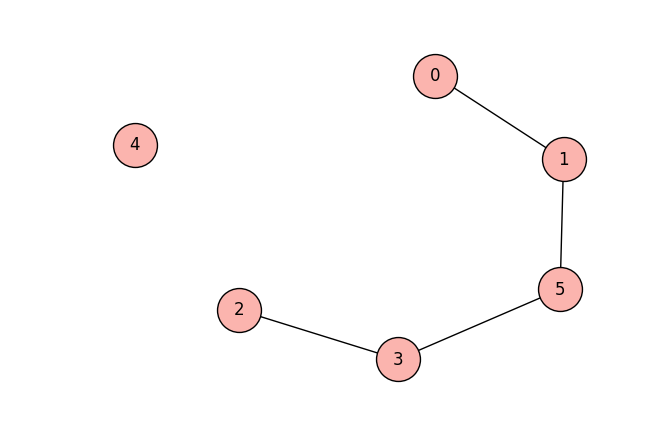

In [4]:
G = nx.gnp_random_graph(6, 0.2, seed=1)
nx.draw(G, node_color='#FBB4AE', node_size=1000, with_labels=True)
plt.show()

In [7]:
print shortest_path(G, 3)

{0: 3, 1: 2, 2: 1, 3: 0, 5: 1}


If we also record the parent node during exploration, we can extract the shortest path by backtracking the destination node up to the source node.